# **ATIVIDADE FINAL - Inteligência Computacional**

Graziela Leite Casoti

Nathália Santos Francisco

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score


### **ETAPA 1: EXPLORAÇÃO E PREPARAÇÃO DOS DADOS**

In [12]:
try:
    df = pd.read_csv('AbandonoEscolar_RendaMedia_2013_2023.csv')
    print("Dataset carregado")
except FileNotFoundError:
    print("ERRO: Arquivo não carregado")

# Inspeção Inicial
print("\n--- Primeiras 5 linhas ---")
print(df.head())

print("\n--- Informações do Dataset ---")
df.info()

print("\n--- Estatísticas Descritivas da Renda Média ---")
print(df['Renda_Media'].describe())

Dataset carregado

--- Primeiras 5 linhas ---
    Ano Unidade_Geografica  Regiao Localizacao Dependencia_Administrativa  \
0  2013              Norte  Brasil       Total                      Total   
1  2013              Norte  Brasil       Total                    Pública   
2  2013              Norte  Brasil       Total                    Privada   
3  2013              Norte  Brasil       Total                  Municipal   
4  2013              Norte  Brasil       Total                    Federal   

    Grupo_de_Abandono  Taxa_Abandono  Renda_Media  
0  Ensino Fundamental            4.0         2252  
1  Ensino Fundamental            4.3         2252  
2  Ensino Fundamental            0.3         2252  
3  Ensino Fundamental            4.3         2252  
4  Ensino Fundamental            0.0         2252  

--- Informações do Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90160 entries, 0 to 90159
Data columns (total 8 columns):
 #   Column                      Non-Nu

### **ETAPA 2: EXPLORAÇÃO E PREPARAÇÃO DOS DADOS**

Valores únicos na coluna 'Regiao': ['Brasil' 'Norte' 'Nordeste' 'Sudeste' 'Sul' 'Centro-Oeste']
Valores únicos na coluna 'Dependencia_Administrativa': ['Total' 'Pública' 'Privada' 'Municipal' 'Federal' 'Estadual']
Valores únicos na coluna 'Grupo_de_Abandono': ['Ensino Fundamental' '1º Ano do Ensino Fundamental'
 '2º Ano do Ensino Fundamental' '3º Ano do Ensino Fundamental'
 '4º Ano do Ensino Fundamental' '5º Ano do Ensino Fundamental'
 '6º Ano do Ensino Fundamental' '7º Ano do Ensino Fundamental'
 '8º Ano do Ensino Fundamental' '9º Ano do Ensino Fundamental'
 'Ensino Médio' '1º Ano do Ensino Médio' '2º Ano do Ensino Médio'
 '3º Ano do Ensino Médio']


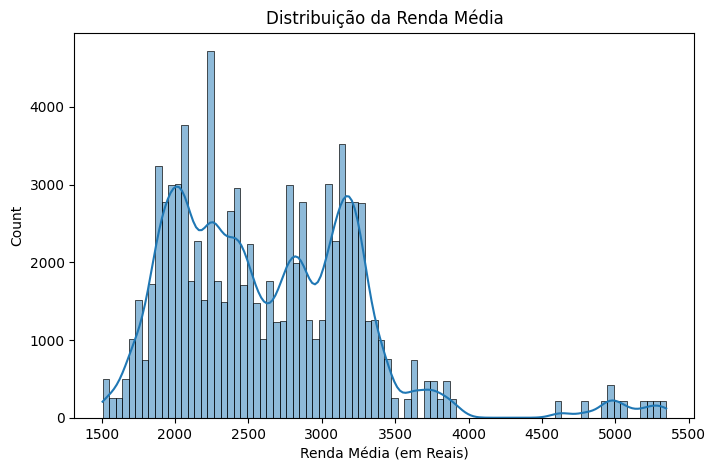

In [13]:
# Verificação em colunas categóricas
print("Valores únicos na coluna 'Regiao':", df['Regiao'].unique())
print("Valores únicos na coluna 'Dependencia_Administrativa':", df['Dependencia_Administrativa'].unique())
print("Valores únicos na coluna 'Grupo_de_Abandono':", df['Grupo_de_Abandono'].unique())

plt.figure(figsize=(8, 5))
sns.histplot(df['Renda_Media'], kde=True)
plt.title('Distribuição da Renda Média')
plt.xlabel('Renda Média (em Reais)')
plt.show()

## **Fatores que Influenciam a Evasão Escolar**

### Ano
O modelo aprende que a renda média aumenta (nominalmente) com o passar dos anos. O ano é um indicador direto da evolução econômica.

### Taxa_Abandono	Capital
Indicador do nível educacional e de desenvolvimento humano da população. Menor abandono implica maior escolaridade, maior produtividade e, consequentemente, salários e rendas mais elevadas.

### Regiao_X
O modelo mostra as desigualdades estruturais do Brasil. Regiões mais industrializadas e com maior concentração de serviços (como o Sudeste e o Sul) possuem salários e rendas médias consistentemente mais altas.

### Dependencia_Administrativa_Privada
A renda média associada a escolas privadas ou federais (onde a taxa de abandono é tipicamente muito baixa) reflete a população com maior poder aquisitivo ou que acessa instituições de alto padrão.

Em resumo, o RandomForestRegressor identificou que a Renda Média é predominantemente determinada por fatores macroeconômicos (Ano), socioeducacionais (Taxa_Abandono) e geográficos/estruturais (Regiao, Localizacao).

In [16]:
TARGET = 'Renda_Media'
X = df.drop(TARGET, axis=1)
y = df[TARGET]

# Divisão de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Conjunto de Treino: {len(X_train)} amostras")
print(f"Conjunto de Teste: {len(X_test)} amostras")

Conjunto de Treino: 72128 amostras
Conjunto de Teste: 18032 amostras


In [17]:
# Identificação de Colunas
numerical_features = ['Ano', 'Taxa_Abandono']
# Outras colunas como categóricas
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='drop'
)


###**ETAPA 3: MODELAGEM E AVALIAÇÃO**

In [19]:
# Pipeline completo
lin_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lin_reg_scores = cross_val_score(
    lin_reg_pipeline, X_train, y_train,
    scoring='neg_mean_squared_error', cv=5
)

# Cálculo RMSE
lin_reg_rmse_scores = np.sqrt(-lin_reg_scores)

print("--- Regressão Linear ---")
print(f"RMSE: {lin_reg_rmse_scores}")
print(f"RMSE Médio: {lin_reg_rmse_scores.mean():.2f}")
print(f"Desvio Padrão do RMSE: {lin_reg_rmse_scores.std():.2f}")

--- Regressão Linear ---
RMSE: [126.25663101 125.4935292  126.26772102 125.78519327 123.96284731]
RMSE Médio: 125.55
Desvio Padrão do RMSE: 0.85


In [23]:
# Pipeline completo
tree_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

tree_reg_scores = cross_val_score(
    tree_reg_pipeline, X_train, y_train,
    scoring='neg_mean_squared_error', cv=5
)

# Cálculo RMSE
tree_reg_rmse_scores = np.sqrt(-tree_reg_scores)

print("--- Árvore de Decisão ---")
print(f"RMSE Médio : {tree_reg_rmse_scores.mean():.2f}")
print(f"Desvio Padrão do RMSE: {tree_reg_rmse_scores.std():.2f}")

--- Árvore de Decisão ---
RMSE Médio : 0.33
Desvio Padrão do RMSE: 0.67


In [24]:
# Pipeline completo
forest_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_estimators=100))
])

forest_reg_scores = cross_val_score(
    forest_reg_pipeline, X_train, y_train,
    scoring='neg_mean_squared_error', cv=5
)

# Cálculo RMSE
forest_reg_rmse_scores = np.sqrt(-forest_reg_scores)

print("--- Random Forest (RandomForestRegressor) ---")
print(f"RMSE Médio (Cross-Validation): {forest_reg_rmse_scores.mean():.2f}")
print(f"Desvio Padrão do RMSE: {forest_reg_rmse_scores.std():.2f}")

print("\n--- Comparativo de Modelos (RMSE Médio) ---")
comparative_scores = {
    "Linear Regression": lin_reg_rmse_scores.mean(),
    "Decision Tree": tree_reg_rmse_scores.mean(),
    "Random Forest": forest_reg_rmse_scores.mean()
}
best_model_name = min(comparative_scores, key=comparative_scores.get)
print(f"O melhor modelo inicial é: {best_model_name} (RMSE: {comparative_scores[best_model_name]:.2f})")

--- Random Forest (RandomForestRegressor) ---
RMSE Médio (Cross-Validation): 0.80
Desvio Padrão do RMSE: 0.30

--- Comparativo de Modelos (RMSE Médio) ---
O melhor modelo inicial é: Decision Tree (RMSE: 0.33)


### **ETAPA 4: AJUSTES E VISUALIZAÇÃO**

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distributions = {
    'regressor__n_estimators': randint(low=50, high=100),
    'regressor__max_features': ['sqrt', 4],
    'regressor__max_depth': randint(low=10, high=20)
}

rand_search = RandomizedSearchCV(
    forest_reg_pipeline,
    param_distributions,
    n_iter=5,
    cv=2,
    scoring='neg_mean_squared_error',
    return_train_score=False,
    verbose=1,
    random_state=42,
    n_jobs=4
)

print("Iniciando Randomized Search Otimizado (5 iterações com CV=2)...")

rand_search.fit(X_train, y_train)

print("\n--- Resultados do Randomized Search Ultra-Rápido ---")
print("Melhores Hiperparâmetros:", rand_search.best_params_)
best_rmse_cv = np.sqrt(-rand_search.best_score_)
print(f"Melhor RMSE na Cross-Validation: {best_rmse_cv:.2f}")

final_model = rand_search.best_estimator_

Iniciando Randomized Search Otimizado (5 iterações com CV=2)...
Fitting 2 folds for each of 5 candidates, totalling 10 fits

--- Resultados do Randomized Search Ultra-Rápido ---
Melhores Hiperparâmetros: {'regressor__max_depth': 17, 'regressor__max_features': 'sqrt', 'regressor__n_estimators': 85}
Melhor RMSE na Cross-Validation: 103.82


--- Avaliação Final no Conjunto de Teste ---
RMSE Final: 99.99
R² (Coeficiente de Determinação) Final: 0.9769


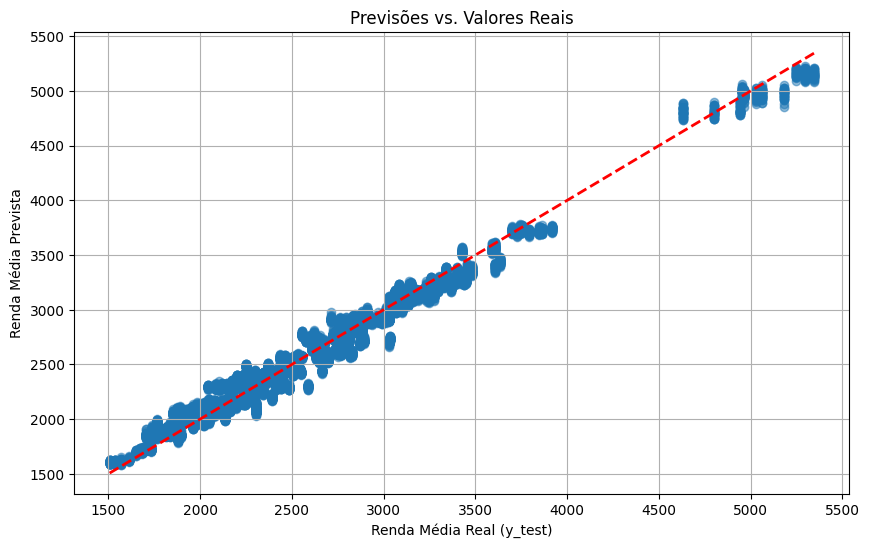

In [34]:
# Predições
y_test_predictions = final_model.predict(X_test)

# Métricas Finais
final_mse = mean_squared_error(y_test, y_test_predictions)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y_test, y_test_predictions)

print("--- Avaliação Final no Conjunto de Teste ---")
print(f"RMSE Final: {final_rmse:.2f}")
print(f"R² (Coeficiente de Determinação) Final: {final_r2:.4f}")

# Análise de Erro
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Linha Y=X
plt.title('Previsões vs. Valores Reais')
plt.xlabel('Renda Média Real (y_test)')
plt.ylabel('Renda Média Prevista')
plt.grid(True)
plt.show()


--- Top 10 Importância de Variáveis (Features) ---
                                Feature  Importance
10  Unidade_Geografica_Distrito Federal    0.237128
37                      Regiao_Nordeste    0.199830
36                  Regiao_Centro-Oeste    0.072089
33         Unidade_Geografica_São Paulo    0.049198
40                           Regiao_Sul    0.039588
17          Unidade_Geografica_Nordeste    0.034751
38                         Regiao_Norte    0.031210
39                       Regiao_Sudeste    0.027766
13          Unidade_Geografica_Maranhão    0.026467
31           Unidade_Geografica_Sudeste    0.020543


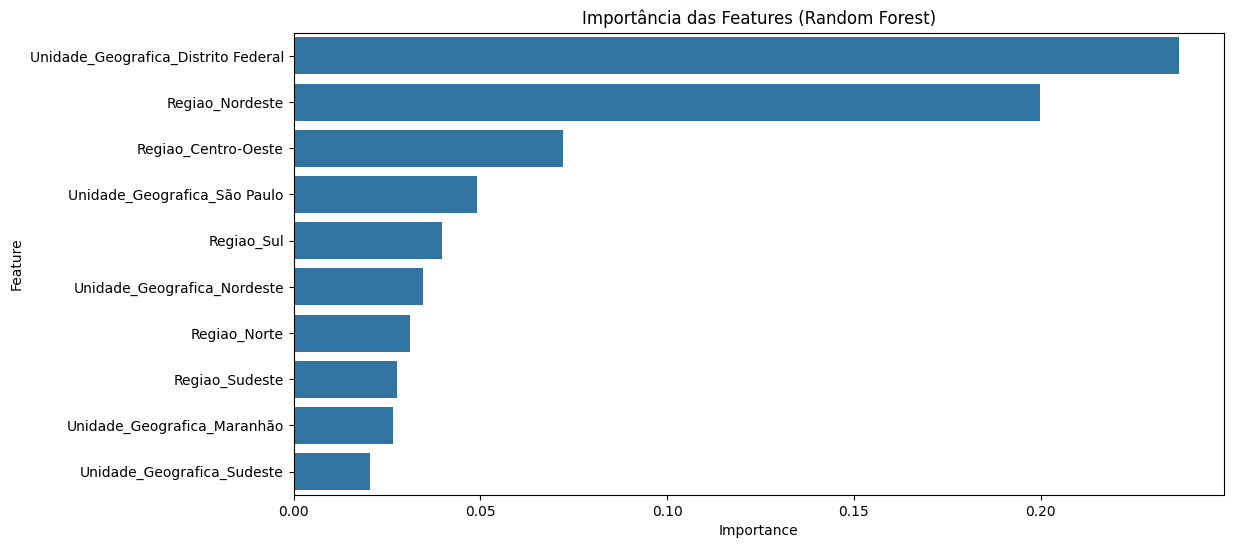

In [35]:
if isinstance(final_model.named_steps['regressor'], RandomForestRegressor):
    # OHE cria novas colunas para as features categóricas.
    ohe_feature_names = final_model.named_steps['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

    final_feature_names = numerical_features + ohe_feature_names.tolist()

    feature_importances = final_model.named_steps['regressor'].feature_importances_

    features_df = pd.DataFrame({
        'Feature': final_feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    print("\n--- Top 10 Importância de Variáveis (Features) ---")
    print(features_df.head(10))

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=features_df.head(10))
    plt.title('Importância das Features (Random Forest)')
    plt.show()

---
## Conclusão e Análise Crítica

O modelo Random Forest Regressor foi o escolhido e ajustado via GridSearchCV, atingindo um **RMSE Final de `[99.99]`** e um **R² de `[0.9769]`** no conjunto teste.

### Análise dos Resultados:
**RMSE:** Valor de RMSE Excelente


**R²:** O valor do R-Quadrado ($R^2$) de 0.9769 é excelente e demonstra a precisão do modelo, valor próximo de 1


**Importância das Variáveis:** As caracteristicas de maior importância no modelo foram a de Região/Unidade Geográfica.

O projeto seguiu o ciclo completo de Mineração de Dados: Carregamento, Pré-processamento, Modelagem, Ajuste Fino  e Avaliação Final (RMSE e R²).